# Fast Tag Fraud Detection Project

# Step 1. Data Exploration
The first step is to thoroughly explore the dataset to understand the distribution of each feature, the prevalence of fraud, and any anomalies or patterns that may exist. The key steps include:

**Summary Statistics:**

 Compute summary statistics for all features to understand their central tendencies and variability.

**Data Visualization:**

 Use histograms, box plots, and scatter plots to visualize the distribution and relationships between features.

**Fraud Prevalence:**

 Calculate the proportion of fraudulent transactions to understand the extent of class imbalance.
Missing Values and Outliers: Identify and handle missing values and outliers appropriately.

**Missing Values and Outliers:**

 Identify and handle missing values and outliers appropriately.

In [1]:
# Import The library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
# Assuming the dataset is in CSV format and named 'fastag_transactions.csv'
df = pd.read_csv('FastagFraudDetection.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981

In [4]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [5]:
# Data Types and Missing Values
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB
None


In [6]:
# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [7]:
# Distribution of Fraud Indicator
print("\nDistribution of Fraud Indicator:")
print(df['Fraud_indicator'].value_counts())


Distribution of Fraud Indicator:
Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


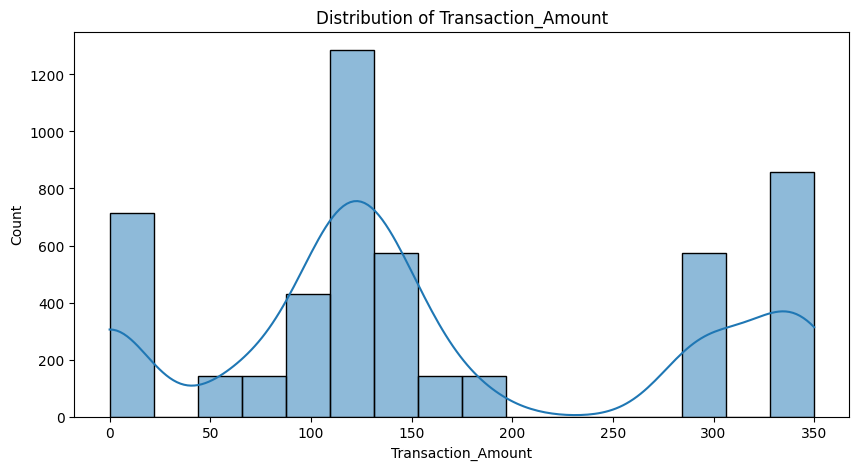

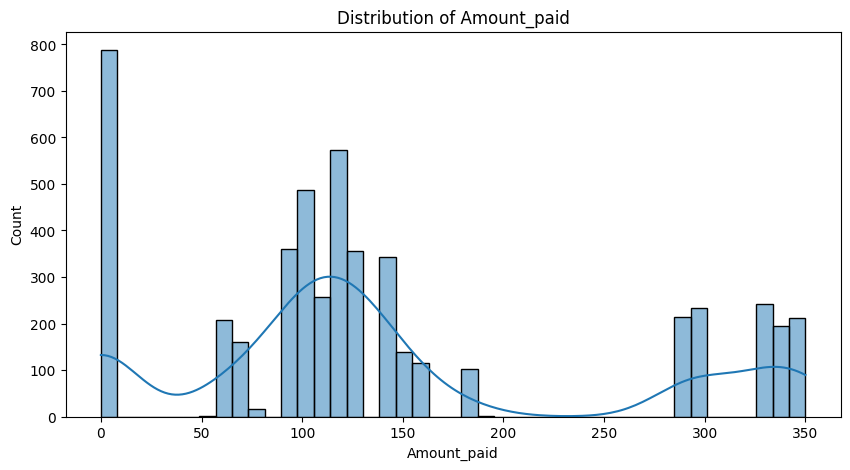

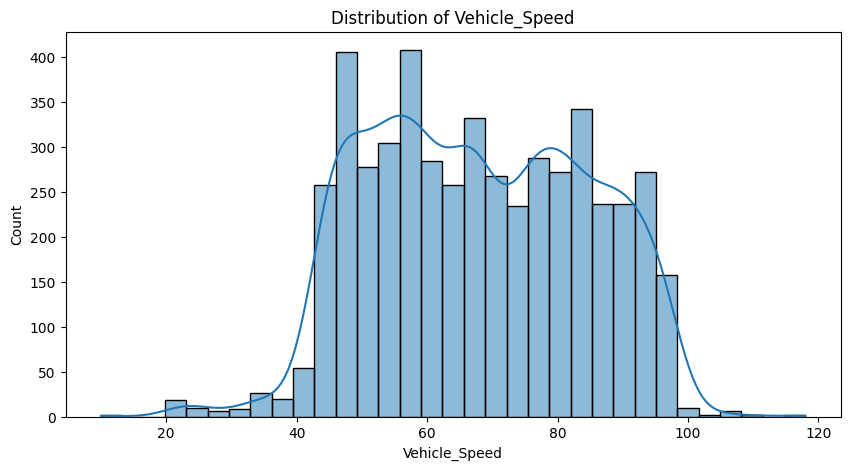

In [8]:
# Visualizing the Distribution of Numerical Features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

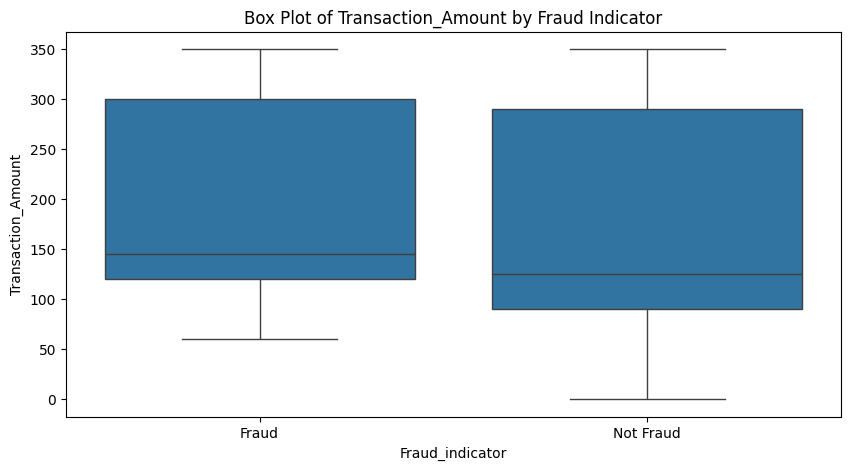

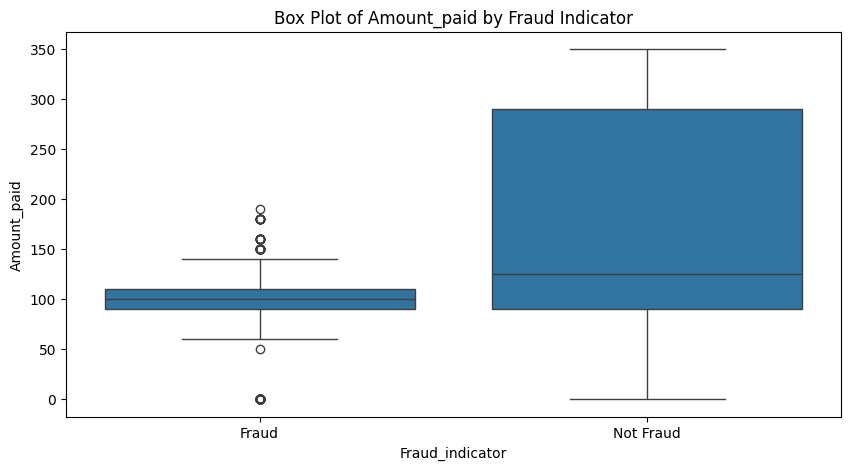

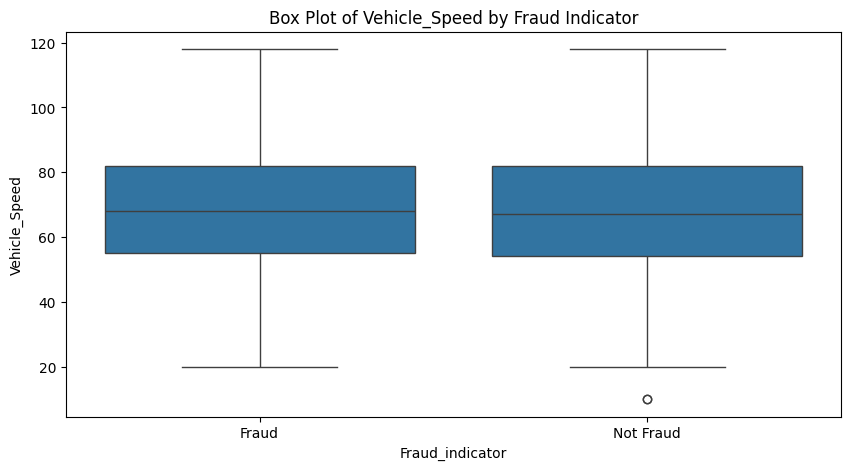

In [9]:
# Box Plots for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['Fraud_indicator'], y=df[feature])
    plt.title(f'Box Plot of {feature} by Fraud Indicator')
    plt.show()

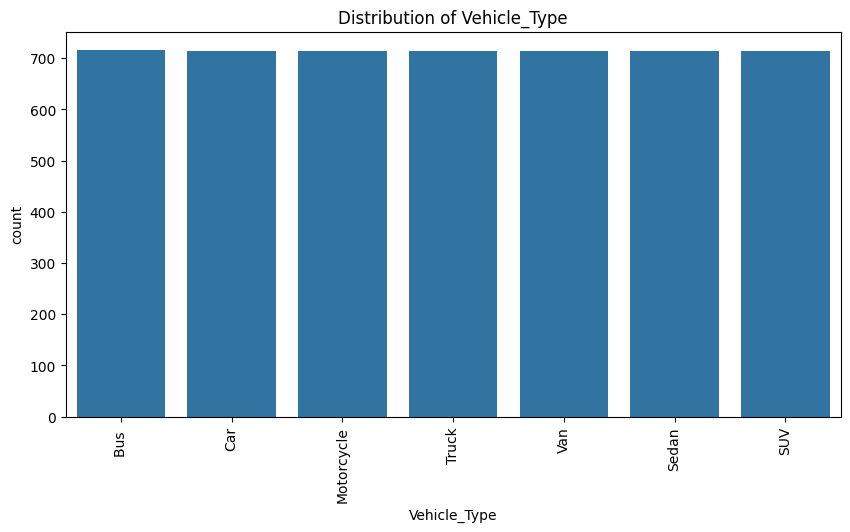

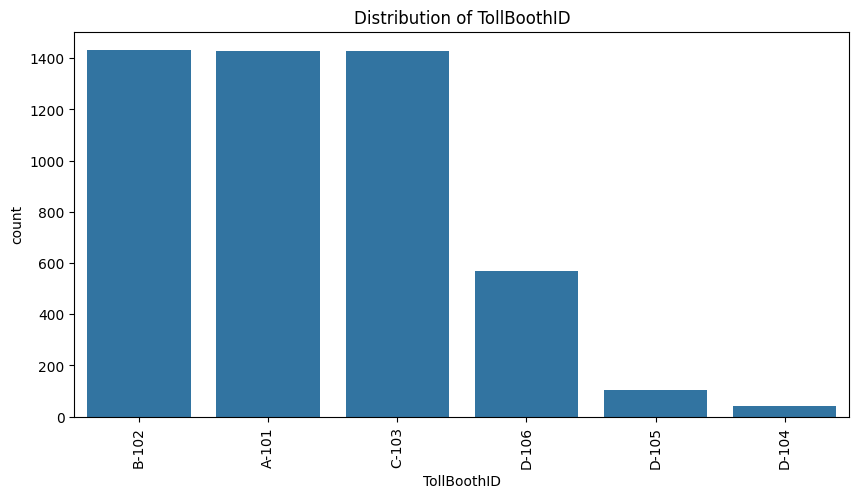

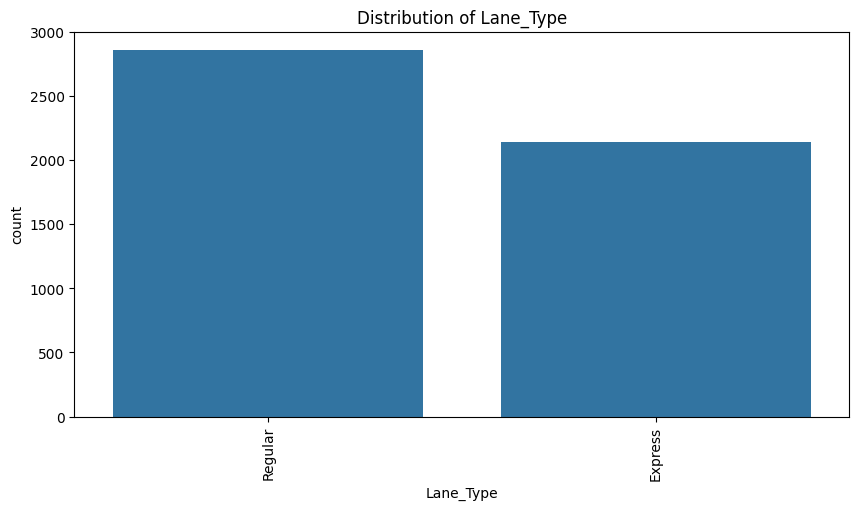

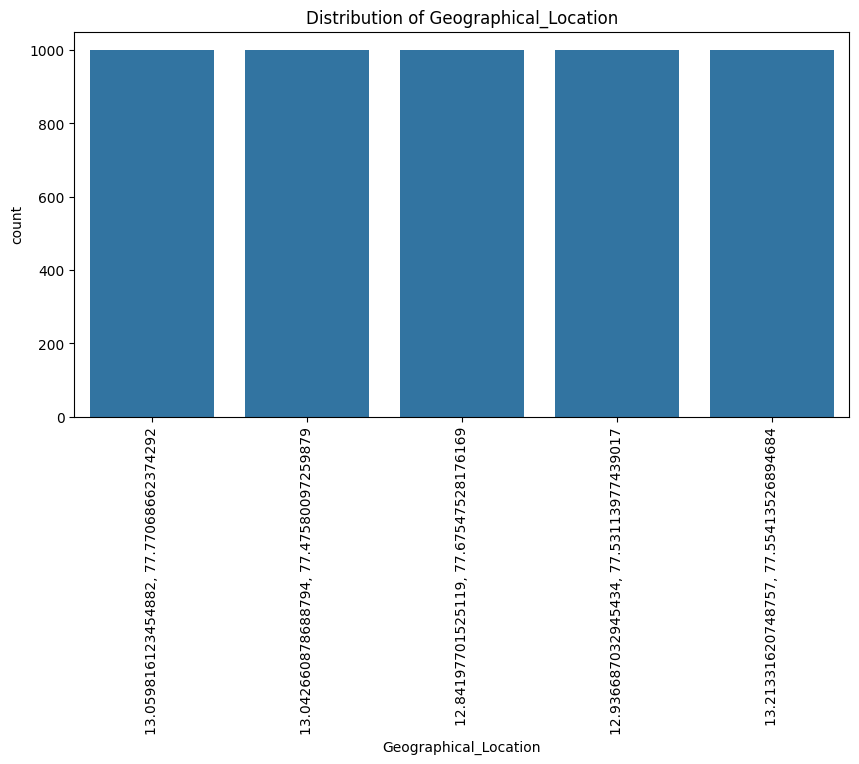

In [10]:
# Distribution of Categorical Features
categorical_features = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Geographical_Location']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

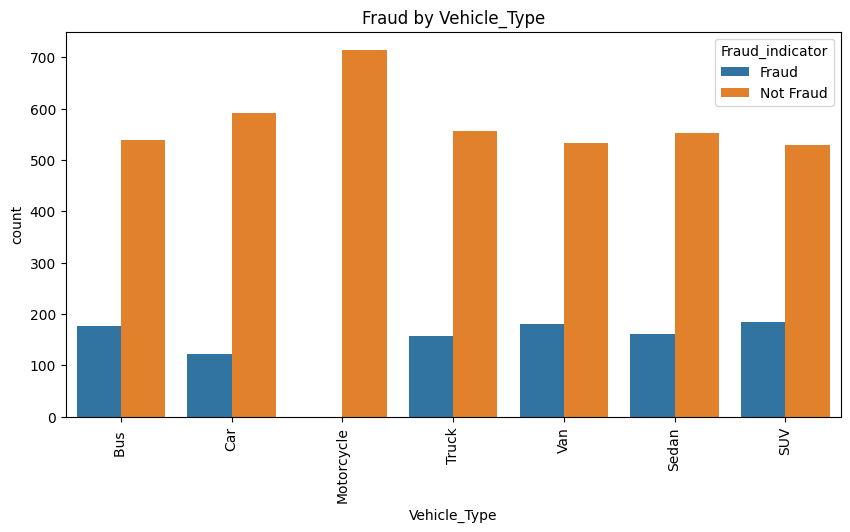

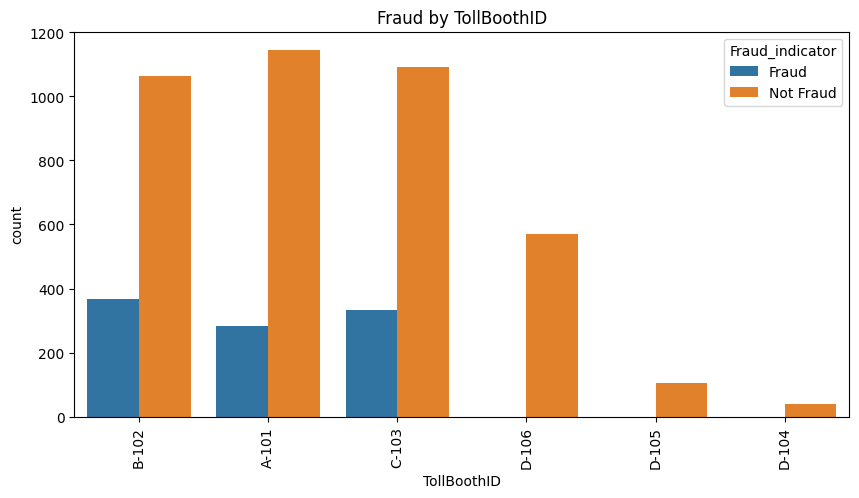

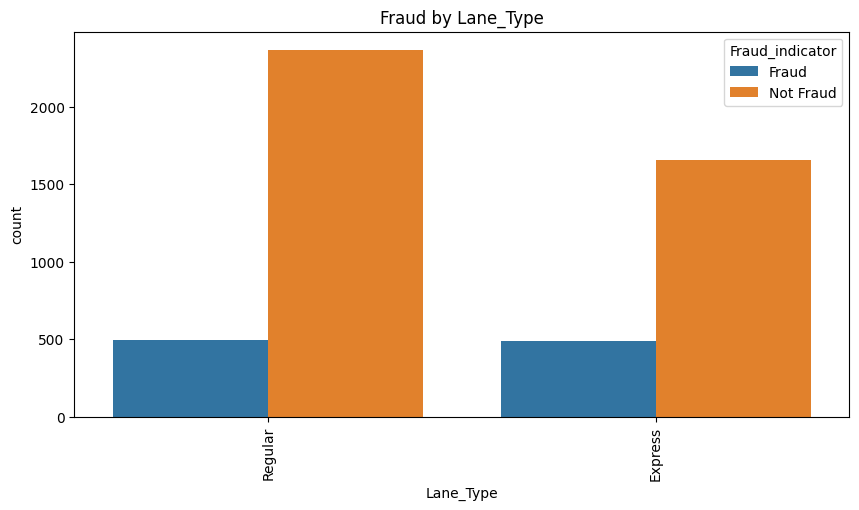

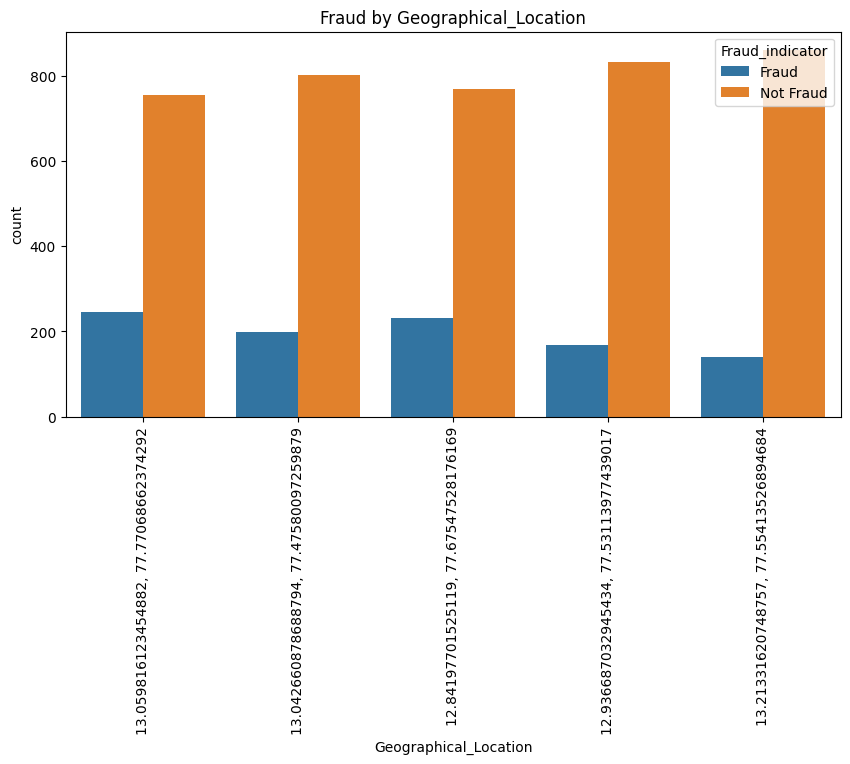

In [11]:
# Visualizing Fraud by Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[feature], hue=df['Fraud_indicator'], order=df[feature].value_counts().index)
    plt.title(f'Fraud by {feature}')
    plt.xticks(rotation=90)
    plt.show()

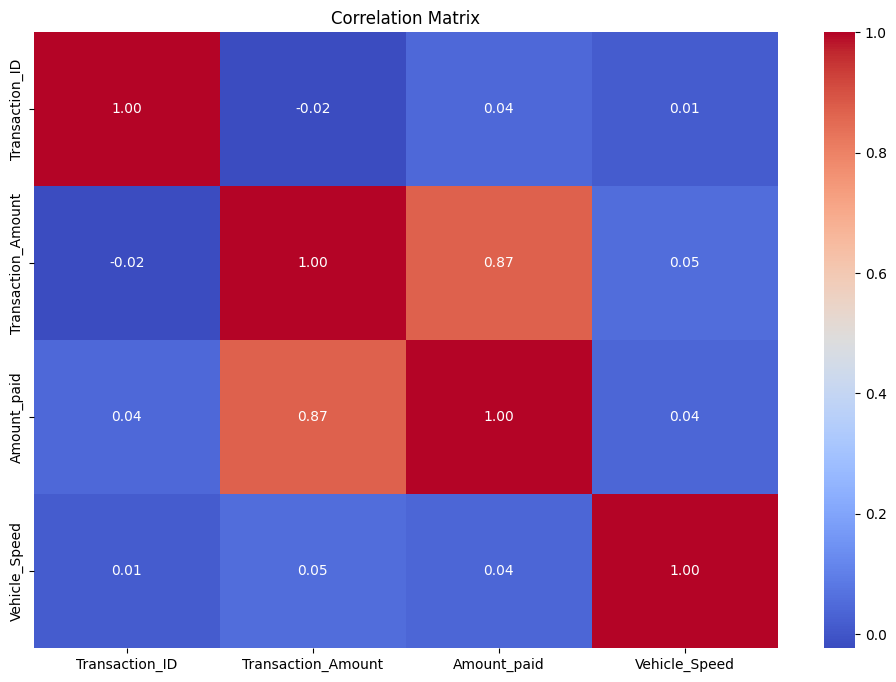

In [12]:

# Convert 'Timestamp' to datetime if it's not already in datetime format
if df['Timestamp'].dtype == 'O':  # 'O' stands for object, which is often a string
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract only numerical features for the correlation matrix
numerical_features = df.select_dtypes(include=[np.number])

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 2. Feature Engineering
Creating relevant features is crucial for improving the model's performance. Potential steps include:

**Time-based Features:**

 Extract day, month, hour, and day of the week from the Timestamp feature.

**Vehicle-specific Features:**

 Derive additional vehicle features from Vehicle_Type and Vehicle_Dimensions.

**Geographical Features:**

 Encode Geographical_Location to capture regional fraud patterns.

**Transaction Ratios:**

Calculate the ratio of Amount_paid to Transaction_Amount.

**Speed Analysis:**

 Use Vehicle_Speed to identify suspiciously high or low speeds.
 
**Frequency Features:**

 Calculate the frequency of transactions per FastagID, TollBoo

In [13]:
import pandas as pd
import numpy as np

# Load the dataset
# Assuming the dataset is in CSV format and named 'fastag_transactions.csv'
df = pd.read_csv('D:\Fast Tag Fraud Detection Project\FastagFraudDetection.csv')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Time-based Features
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Vehicle-specific Features
# Assuming Vehicle_Dimensions is a string in the format "length,width,height"
def is_numeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Split the dimensions into separate columns
dimensions_split = df['Vehicle_Dimensions'].str.split(',', expand=True)

# Check if each part of the split is numeric
valid_dimensions = dimensions_split.applymap(is_numeric).all(axis=1)

# Keep only the valid rows
valid_dimensions_split = dimensions_split[valid_dimensions]

# Verify the structure of the split dimensions
print("Structure of split dimensions:")
print(valid_dimensions_split.head())

# Ensure we have exactly three columns
if valid_dimensions_split.shape[1] == 3:
    # Convert the split columns to float
    valid_dimensions_split = valid_dimensions_split.astype(float)

    # Add the new columns to the original DataFrame
    df.loc[valid_dimensions, 'Vehicle_Length'] = valid_dimensions_split[0]
    df.loc[valid_dimensions, 'Vehicle_Width'] = valid_dimensions_split[1]
    df.loc[valid_dimensions, 'Vehicle_Height'] = valid_dimensions_split[2]
else:
    print("Error: Expected 3 columns after splitting Vehicle_Dimensions. Got:", valid_dimensions_split.shape[1])

# Geographical Features
# Encoding Geographical_Location (assuming it's a categorical variable)
df['Geographical_Location'] = df['Geographical_Location'].astype('category')
df['Geographical_Location_Code'] = df['Geographical_Location'].cat.codes

# Transaction Ratios
df['Amount_Ratio'] = df['Amount_paid'] / df['Transaction_Amount'] # hHis means divide : Amount Paid / Transaction Amount

# Speed Analysis
# Creating a binary feature for suspiciously high or low speeds
speed_threshold_high = 120  # Example threshold, you may adjust based on domain knowledge (use computer vision threshold pipelines)
speed_threshold_low = 10    # Example threshold, you may adjust based on domain knowledge
df['Suspicious_Speed'] = ((df['Vehicle_Speed'] > speed_threshold_high) | (df['Vehicle_Speed'] < speed_threshold_low)).astype(int)

# Frequency Features
# Frequency of transactions per FastagID
df['FastagID_Frequency'] = df.groupby('FastagID')['FastagID'].transform('count')

# Frequency of transactions per TollBoothID
df['TollBoothID_Frequency'] = df.groupby('TollBoothID')['TollBoothID'].transform('count')

# Frequency of transactions per Vehicle_Plate_Number
df['Vehicle_Plate_Frequency'] = df.groupby('Vehicle_Plate_Number')['Vehicle_Plate_Number'].transform('count')

# Drop original columns that have been transformed or encoded
df.drop(columns=['Timestamp', 'Vehicle_Dimensions', 'Geographical_Location'], inplace=True)

# Display the first few rows of the modified DataFrame
print("First few rows after feature engineering:")
print(df.head())


Structure of split dimensions:
Empty DataFrame
Columns: [0]
Index: []
Error: Expected 3 columns after splitting Vehicle_Dimensions. Got: 1
First few rows after feature engineering:
   Transaction_ID Vehicle_Type         FastagID TollBoothID Lane_Type  \
0               1         Bus   FTG-001-ABC-121       A-101   Express   
1               2          Car  FTG-002-XYZ-451       B-102   Regular   
2               3   Motorcycle              NaN       D-104   Regular   
3               4        Truck  FTG-044-LMN-322       C-103   Regular   
4               5          Van  FTG-505-DEF-652       B-102   Express   

   Transaction_Amount  Amount_paid  Vehicle_Speed Vehicle_Plate_Number  \
0                 350          120             65           KA11AB1234   
1                 120          100             78           KA66CD5678   
2                   0            0             53           KA88EF9012   
3                 350          120             92           KA11GH3456   
4         

#  3. Model Development
Build a machine learning classification model to predict fraudulent transactions. Steps include:

**Data Splitting:**

 Split the data into training and test sets to evaluate model performance.

**Baseline Model:** 

Start with a simple model such as Logistic Regression to set a performance baseline.

**Advanced Models:**

 Experiment with more complex models like Decision Trees, Random Forests, Gradient Boosting Machines, and Neural Networks.

**Handling Imbalance:**

 Use techniques such as SMOTE, ADASYN, or class weighting to address class imbalance.
Hyperparameter Tuning: Use grid search or random search to fine-tune model hyperparameters.

In [17]:
%pip install scikit-learn

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
try:
    df = pd.read_csv(r'D:\Fast Tag Fraud Detection Project\FastagFraudDetection.csv')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Ensure the dataset has been preprocessed
if 'Fraud_indicator' not in df.columns:
    raise ValueError("Target variable 'Fraud_indicator' not found in dataset.")

# Extract features and target variable
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# Preprocess date columns (assuming 'Date' column exists and is in the format 'MM/DD/YYYY HH:MM')
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Process date columns
for col in X.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        X[col] = pd.to_datetime(X[col], errors='coerce')
        X[col + '_day'] = X[col].dt.day
        X[col + '_month'] = X[col].dt.month
        X[col + '_year'] = X[col].dt.year
        X[col + '_hour'] = X[col].dt.hour
        X.drop(columns=[col], inplace=True)
        numerical_cols.extend([col + '_day', col + '_month', col + '_year', col + '_hour'])

# Drop columns that cannot be converted to numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric and fill NaNs with 0

# Update numerical and categorical columns after conversion
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a pipeline for model training
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Baseline Model: Logistic Regression
log_reg = create_pipeline(LogisticRegression(random_state=42))
log_reg.fit(X_train_smote, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Advanced Models
# Decision Tree
tree = create_pipeline(DecisionTreeClassifier(random_state=42))
tree.fit(X_train_smote, y_train_smote)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Random Forest
rf = create_pipeline(RandomForestClassifier(random_state=42))
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Machine
gbm = create_pipeline(GradientBoostingClassifier(random_state=42))
gbm.fit(X_train_smote, y_train_smote)
y_pred_gbm = gbm.predict(X_test)

print("Gradient Boosting Machine Classification Report:")
print(classification_report(y_test, y_pred_gbm))

# Neural Network
mlp = create_pipeline(MLPClassifier(random_state=42))
mlp.fit(X_train_smote, y_train_smote)
y_pred_mlp = mlp.predict(X_test)



Dataset loaded successfully.
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.89      0.94       197
   Not Fraud       0.97      1.00      0.99       803

    accuracy                           0.98      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000

Decision Tree Classification Report:
              precision    recall  f1-score   support

       Fraud       0.99      0.99      0.99       197
   Not Fraud       1.00      1.00      1.00       803

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.97      0.98       197
   Not Fraud       0.99      1.00      1.00       803

    accuracy                        

c:\Users\nazish\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#  4. Model Evaluation and Fine-tuning
Evaluate the models using appropriate metrics and fine-tune for optimal performance:

. Evaluation Metrics: 

Use precision, recall, F1 score, accuracy, and ROC-AUC to assess model performance.

. Cross-validation:

 Use cross-validation to ensure the model generalizes well to unseen data.

. Threshold Optimization: 

Adjust the decision threshold to balance precision and recall according to business needs.

Dataset loaded successfully.
Logistic Regression Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       803
           1       1.00      0.91      0.95       197

    accuracy                           0.98      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy: 0.982
Precision: 1.0
Recall: 0.9086294416243654
F1 Score: 0.9521276595744681
ROC-AUC Score: 0.9800115050793029
Decision Tree Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      0.99      1.00       197

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 0.999
Precision: 1.0
Recall: 0.9949238578680203
F1 Score: 0.9974554707379135
ROC-A

c:\Users\nazish\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      0.98      0.99       197

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 0.997
Precision: 1.0
Recall: 0.9847715736040609
F1 Score: 0.9923273657289001
ROC-AUC Score: 0.9997787484749449
Best parameters found by grid search for Random Forest:
{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Tuned Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       803
           1       1.00      0.95      0.98       197

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99

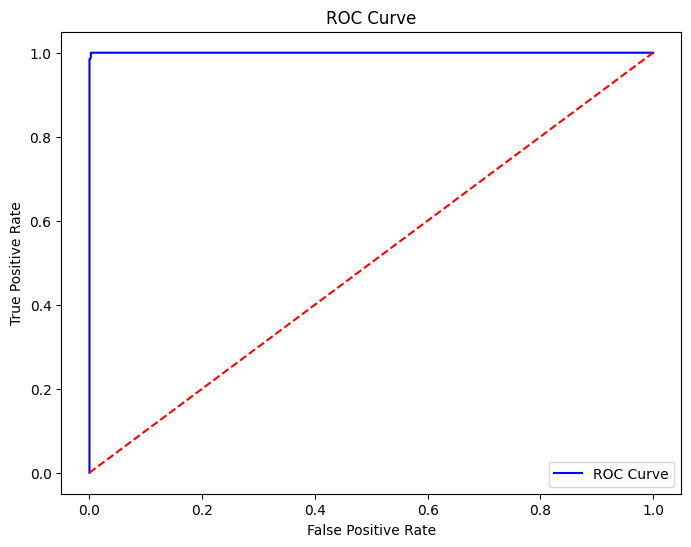

Best Threshold=0.230000, G-Mean=0.999
Optimized Threshold Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       0.99      1.00      0.99       197

    accuracy                           1.00      1000
   macro avg       0.99      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 0.998
Precision: 0.9899497487437185
Recall: 1.0
F1 Score: 0.9949494949494949
ROC-AUC Score: 0.9999652319032055


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv(r'D:\Fast Tag Fraud Detection Project\FastagFraudDetection.csv')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Ensure the dataset has been preprocessed
if 'Fraud_indicator' not in df.columns:
    raise ValueError("Target variable 'Fraud_indicator' not found in dataset.")

# Extract features and target variable
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# Preprocess date columns (assuming 'Date' column exists and is in the format 'MM/DD/YYYY HH:MM')
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Process date columns
for col in X.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        X[col] = pd.to_datetime(X[col], errors='coerce')
        X[col + '_day'] = X[col].dt.day
        X[col + '_month'] = X[col].dt.month
        X[col + '_year'] = X[col].dt.year
        X[col + '_hour'] = X[col].dt.hour
        X.drop(columns=[col], inplace=True)
        numerical_cols.extend([col + '_day', col + '_month', col + '_year', col + '_hour'])

# Drop columns that cannot be converted to numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric and fill NaNs with 0

# Update numerical and categorical columns after conversion
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Convert target variable to numeric
y = y.map({'Not Fraud': 0, 'Fraud': 1})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a pipeline for model training
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Model evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Baseline Model: Logistic Regression
log_reg = create_pipeline(LogisticRegression(random_state=42))
log_reg.fit(X_train_smote, y_train_smote)
print("Logistic Regression Evaluation:")
evaluate_model(log_reg, X_test, y_test)

# Advanced Models
# Decision Tree
tree = create_pipeline(DecisionTreeClassifier(random_state=42))
tree.fit(X_train_smote, y_train_smote)
print("Decision Tree Evaluation:")
evaluate_model(tree, X_test, y_test)

# Random Forest
rf = create_pipeline(RandomForestClassifier(random_state=42))
rf.fit(X_train_smote, y_train_smote)
print("Random Forest Evaluation:")
evaluate_model(rf, X_test, y_test)

# Gradient Boosting Machine
gbm = create_pipeline(GradientBoostingClassifier(random_state=42))
gbm.fit(X_train_smote, y_train_smote)
print("Gradient Boosting Machine Evaluation:")
evaluate_model(gbm, X_test, y_test)

# Neural Network
mlp = create_pipeline(MLPClassifier(random_state=42)) # Mutliple Layers Perceptr.
mlp.fit(X_train_smote, y_train_smote)
print("Neural Network Evaluation:")
evaluate_model(mlp, X_test, y_test)

# Hyperparameter Tuning with Grid Search for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(create_pipeline(RandomForestClassifier(random_state=42)), param_grid, cv=5, scoring='f1', error_score='raise')
grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found by grid search for Random Forest:")
print(grid_search.best_params_)

# Evaluate the best model from grid search
best_rf = grid_search.best_estimator_
print("Tuned Random Forest Evaluation:")
evaluate_model(best_rf, X_test, y_test)

# Threshold Optimization
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def optimize_threshold(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plot_roc_curve(fpr, tpr)

    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    best_threshold = thresholds[ix]
    print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold, gmeans[ix]))

    return best_threshold

best_threshold = optimize_threshold(best_rf, X_test, y_test)

# Apply the optimized threshold
y_proba = best_rf.predict_proba(X_test)[:, 1]
y_pred_optimized = np.where(y_proba >= best_threshold, 1, 0)

print("Optimized Threshold Random Forest Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Precision:", precision_score(y_test, y_pred_optimized, pos_label=1))
print("Recall:", recall_score(y_test, y_pred_optimized, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred_optimized, pos_label=1))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


# 5. Real-time Fraud Detection Feasibility

Explore the feasibility of implementing the model for real-time fraud detection:

. Model Deployment:

 Plan for model deployment using tools like Flask or FastAPI for real-time predictions.

. Latency and Throughput:

 Ensure the model meets the required latency and throughput for real-time processing.
 
.Monitoring and Updating:

 Set up monitoring to track model performance and a mechanism for periodic updates.

In [21]:
import joblib

# Save the preprocessor and model pipeline
joblib.dump(best_rf, 'fraud_detection_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [22]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

# Load the trained model and preprocessor
model = joblib.load('fraud_detection_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()
        
        # Convert JSON to DataFrame
        df = pd.DataFrame([data])
        
        # Preprocess the input data
        processed_data = preprocessor.transform(df)
        
        # Make prediction
        prediction_proba = model.predict_proba(processed_data)[:, 1]
        prediction = np.where(prediction_proba >= 0.5, 'Fraud', 'Not Fraud')[0]
        
        # Return the prediction as JSON
        return jsonify({'prediction': prediction, 'probability': float(prediction_proba[0])})
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\nazish\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
